In [2]:
import pandas as pd
from ast import literal_eval

In [3]:
movies_metadata = pd.read_csv("data/movies_metadata.csv")
movies_metadata.shape

C:\Users\C402\AppData\Local\Temp\ipykernel_20192\1855133637.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv("data/movies_metadata.csv")


(45466, 24)

In [4]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
movies_metadata['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [8]:
links_small_raw = pd.read_csv("data/links_small.csv")
links_small_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


In [9]:
links_small_raw.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [22]:
links_small_raw['tmdbId'].notnull().info()


<class 'pandas.core.series.Series'>
RangeIndex: 9125 entries, 0 to 9124
Series name: tmdbId
Non-Null Count  Dtype
--------------  -----
9125 non-null   bool 
dtypes: bool(1)
memory usage: 9.0 KB


In [17]:
# tmdbId 사용. 
# links_small_raw[links_small_raw['tmdbId'].notnull()]['tmdbId'].astype('int')
links_small = links_small_raw.loc[links_small_raw['tmdbId'].notnull(), 'tmdbId'].astype('int') 
links_small

0          862
1         8844
2        15602
3        31357
4        11862
         ...  
9120    402672
9121    315011
9122    391698
9123    137608
9124    410803
Name: tmdbId, Length: 9112, dtype: int64

In [27]:
links_small.info()

<class 'pandas.core.series.Series'>
Index: 9112 entries, 0 to 9124
Series name: tmdbId
Non-Null Count  Dtype
--------------  -----
9112 non-null   int64
dtypes: int64(1)
memory usage: 142.4 KB


In [28]:
movies_metadata.shape

(45466, 24)

In [45]:
links_small

0          862
1         8844
2        15602
3        31357
4        11862
         ...  
9120    402672
9121    315011
9122    391698
9123    137608
9124    410803
Name: tmdbId, Length: 9112, dtype: int64

In [29]:
movies_metadata['id'].isin(links_small.astype('str'))

0         True
1         True
2         True
3         True
4         True
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: id, Length: 45466, dtype: bool

In [30]:
# movies_metadata['id'] 가 tmdbId 이다.
movies_metadata_small = movies_metadata[ movies_metadata['id'].isin(links_small.astype('str')) ]
movies_metadata_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9099 entries, 0 to 45265
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  9099 non-null   object 
 1   belongs_to_collection  1674 non-null   object 
 2   budget                 9099 non-null   object 
 3   genres                 9099 non-null   object 
 4   homepage               1974 non-null   object 
 5   id                     9099 non-null   object 
 6   imdb_id                9099 non-null   object 
 7   original_language      9099 non-null   object 
 8   original_title         9099 non-null   object 
 9   overview               9087 non-null   object 
 10  popularity             9099 non-null   object 
 11  poster_path            9096 non-null   object 
 12  production_companies   9099 non-null   object 
 13  production_countries   9099 non-null   object 
 14  release_date           9099 non-null   object 
 15  revenue 

In [32]:
movies = movies_metadata_small[['title','popularity','genres','release_date']]
movies

,title,popularity,genres,release_date
0,Toy Story,21.946943,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30
1,Jumanji,17.015539,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15
2,Grumpier Old Men,11.7129,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22
3,Waiting to Exhale,3.859495,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22
4,Father of the Bride Part II,8.387519,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10
...,...,...,...,...
40224,Shin Godzilla,9.285519,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2016-07-29
40503,The Beatles: Eight Days a Week - The Touring Y...,7.078301,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",2016-09-15
44821,Pokémon: Spell of the Unknown,6.480376,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2000-07-08
44826,Pokémon 4Ever: Celebi - Voice of the Forest,6.080108,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2001-07-06


In [33]:
movies['genres'].loc[0] # 레이블(Label)이 0인 데이터

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [74]:
df = pd.DataFrame({
    "math":[80,90,100],
    "eng":[75,85,95]
})
df

,math,eng
0,80,75
1,90,85
2,100,95


In [68]:
df.apply(lambda x:x.mean())

math    90.0
eng     85.0
dtype: float64

In [ ]:
# 장르가 지정 되지 않은 영화 확인
movies['genres'].eq('[]').value_counts()

genres
False    9064
True       35
Name: count, dtype: int64

In [41]:
movies['genres'].isna().sum()


np.int64(0)

In [59]:
movies['genres'] \
    .apply(literal_eval) \
    .apply(lambda x: sorted(i['name'] for i in x) if isinstance(x, list) else [] ) \
    .apply(lambda x:" ".join(x) if len(x)>0 else None ).info()

<class 'pandas.core.series.Series'>
Index: 9099 entries, 0 to 45265
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
9064 non-null   object
dtypes: object(1)
memory usage: 400.2+ KB


In [65]:
# fillna('[]') 결측치를 '[]'로 변환. 결과적으로 결측치가 제거 된다.
# apply(literal_eval) 문자열을 list 데이터로 변한
str_genres = movies['genres'].apply(literal_eval).apply(lambda x: sorted(i['name'] for i in x) if isinstance(x, list) else []) \
    .apply(lambda x: " ".join(x) if len(x) > 0 else None)
str_genres.info()

<class 'pandas.core.series.Series'>
Index: 9099 entries, 0 to 45265
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
9064 non-null   object
dtypes: object(1)
memory usage: 400.2+ KB


In [70]:
str_genres.apply(lambda x: x == None ).sum()

np.int64(35)

In [71]:
movies['str_genres'] = str_genres
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9099 entries, 0 to 45265
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         9099 non-null   object        
 1   popularity    9099 non-null   object        
 2   genres        9099 non-null   object        
 3   release_date  9099 non-null   datetime64[ns]
 4   str_genres    9064 non-null   object        
 5   year          9099 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 720.1+ KB


C:\Users\C402\AppData\Local\Temp\ipykernel_20192\92289792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['str_genres'] = str_genres


In [54]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

C:\Users\C402\AppData\Local\Temp\ipykernel_20192\1211608248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['release_date'] = pd.to_datetime(movies['release_date'])


In [55]:
type(movies['release_date'].dt)

pandas.core.indexes.accessors.DatetimeProperties

In [56]:
movies['year'] = movies['release_date'].dt.year

C:\Users\C402\AppData\Local\Temp\ipykernel_20192\4256326310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['year'] = movies['release_date'].dt.year


In [72]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9099 entries, 0 to 45265
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         9099 non-null   object        
 1   popularity    9099 non-null   object        
 2   genres        9099 non-null   object        
 3   release_date  9099 non-null   datetime64[ns]
 4   str_genres    9064 non-null   object        
 5   year          9099 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 720.1+ KB


### 결측치 제거

In [73]:
movies.isnull().sum()

title            0
popularity       0
genres           0
release_date     0
str_genres      35
year             0
dtype: int64

In [77]:
movies1 = movies.dropna()
movies1

,title,popularity,genres,release_date,str_genres,year
0,Toy Story,21.946943,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,Animation Comedy Family,1995
1,Jumanji,17.015539,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,Adventure Family Fantasy,1995
2,Grumpier Old Men,11.7129,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22,Comedy Romance,1995
3,Waiting to Exhale,3.859495,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22,Comedy Drama Romance,1995
4,Father of the Bride Part II,8.387519,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,Comedy,1995
...,...,...,...,...,...,...
40224,Shin Godzilla,9.285519,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2016-07-29,Action Adventure Drama Horror Science Fiction,2016
40503,The Beatles: Eight Days a Week - The Touring Y...,7.078301,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",2016-09-15,Documentary Music,2016
44821,Pokémon: Spell of the Unknown,6.480376,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2000-07-08,Action Adventure Animation Family Fantasy,2000
44826,Pokémon 4Ever: Celebi - Voice of the Forest,6.080108,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2001-07-06,Adventure Animation Family Fantasy Science Fic...,2001


In [78]:
movies = movies1.reset_index(drop=True)

In [79]:
movies

,title,popularity,genres,release_date,str_genres,year
0,Toy Story,21.946943,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,Animation Comedy Family,1995
1,Jumanji,17.015539,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,Adventure Family Fantasy,1995
2,Grumpier Old Men,11.7129,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22,Comedy Romance,1995
3,Waiting to Exhale,3.859495,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22,Comedy Drama Romance,1995
4,Father of the Bride Part II,8.387519,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,Comedy,1995
...,...,...,...,...,...,...
9059,Shin Godzilla,9.285519,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2016-07-29,Action Adventure Drama Horror Science Fiction,2016
9060,The Beatles: Eight Days a Week - The Touring Y...,7.078301,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",2016-09-15,Documentary Music,2016
9061,Pokémon: Spell of the Unknown,6.480376,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2000-07-08,Action Adventure Animation Family Fantasy,2000
9062,Pokémon 4Ever: Celebi - Voice of the Forest,6.080108,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2001-07-06,Adventure Animation Family Fantasy Science Fic...,2001


### BoW 기반 Contents Based Filtering

In [126]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vector = CountVectorizer()

In [136]:
genre_mat = bow_vector.fit_transform(movies['str_genres'])
genre_mat.shape

(9064, 22)

In [138]:
bow_vector.vocabulary_

{'animation': 2,
 'comedy': 3,
 'family': 7,
 'adventure': 1,
 'fantasy': 8,
 'romance': 16,
 'drama': 6,
 'action': 0,
 'crime': 4,
 'thriller': 18,
 'horror': 12,
 'history': 11,
 'science': 17,
 'fiction': 9,
 'mystery': 15,
 'war': 20,
 'foreign': 10,
 'music': 14,
 'documentary': 5,
 'western': 21,
 'tv': 19,
 'movie': 13}

In [139]:
type(genre_mat)

scipy.sparse._csr.csr_matrix

In [23]:
genre_mat.toarray()[0]

NameError: name 'genre_mat' is not defined

### 코사인 유사도 측정
* 90도 면 관련이 없다

In [143]:
from sklearn.metrics.pairwise import cosine_similarity

In [145]:
similarity_of_genre = cosine_similarity(genre_mat, genre_mat) # data:genre_mat
similarity_of_genre.shape

(9064, 9064)

In [146]:
similarity_of_genre

array([[1.        , 0.33333333, 0.40824829, ..., 0.51639778, 0.47140452,
        0.40824829],
       [0.33333333, 1.        , 0.        , ..., 0.77459667, 0.70710678,
        0.        ],
       [0.40824829, 0.        , 1.        , ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.51639778, 0.77459667, 0.        , ..., 1.        , 0.73029674,
        0.        ],
       [0.47140452, 0.70710678, 0.        , ..., 0.73029674, 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ]], shape=(9064, 9064))

In [147]:
# argsort 
import numpy as np
a = np.array([30, 40, 51, 47, 40])
index = np.argsort(a)
index

array([0, 1, 4, 3, 2])

In [156]:
movies[['title', 'str_genres']].loc[0:2,:]

,title,str_genres
0,Toy Story,Animation Comedy Family
1,Jumanji,Adventure Family Fantasy
2,Grumpier Old Men,Comedy Romance


In [157]:
sorted_similarity_of_genre = similarity_of_genre.argsort()
sorted_similarity_of_genre

array([[  38, 7848, 9060, ..., 2718, 7064,    0],
       [ 926, 9054, 9063, ..., 8327, 5010,    1],
       [  58,   73, 9059, ...,    6,   49,   60],
       ...,
       [9060,   60,   61, ..., 9061, 3358, 7904],
       [9040, 9054, 9060, ..., 3020, 4340, 4238],
       [3400, 9042, 9043, ..., 6537, 3404, 3394]], shape=(9064, 9064))

In [165]:
sorted_similarity_of_genre =  sorted_similarity_of_genre[:,::-1]
sorted_similarity_of_genre

array([[   0, 7064, 2718, ..., 9060, 7848,   38],
       [   1, 5010, 8327, ..., 9063, 9054,  926],
       [  60,   49,    6, ..., 9059,   73,   58],
       ...,
       [7904, 3358, 9061, ...,   61,   60, 9060],
       [4238, 4340, 3020, ..., 9060, 9054, 9040],
       [3394, 3404, 6537, ..., 9043, 9042, 3400]], shape=(9064, 9064))

In [1]:
movies[['title', 'str_genres']].iloc[[0, 38],:]



NameError: name 'movies' is not defined

In [199]:
genre_mat_t = genre_mat.T

In [208]:
similarity_of_genre_t = cosine_similarity(genre_mat_t)
similarity_of_genre_t.shape

(22, 22)

In [ ]:
genre_names = bow_vector.get_feature_names_out()
genre_names

array(['action', 'adventure', 'animation', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'fiction', 'foreign',
       'history', 'horror', 'movie', 'music', 'mystery', 'romance',
       'science', 'thriller', 'tv', 'war', 'western'], dtype=object)

In [212]:
genre_sim_df = pd.DataFrame(similarity_of_genre_t, index=genre_names, columns=genre_names)
genre_sim_df

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
action,1.000000,0.478024,0.090627,0.181916,0.297588,0.007765,0.215775,0.093553,0.169741,0.311391,...,0.087451,0.007849,0.020210,0.087007,0.059905,0.311391,0.412776,0.007849,0.123026,0.116487
adventure,0.478024,1.000000,0.238279,0.167288,0.075691,0.006705,0.147539,0.326486,0.292526,0.275190,...,0.034285,0.018975,0.028502,0.050892,0.071745,0.275190,0.175959,0.018975,0.083982,0.103410
animation,0.090627,0.238279,1.000000,0.137159,0.005354,0.000000,0.045889,0.454478,0.221518,0.126081,...,0.010964,0.023406,0.058038,0.011160,0.024261,0.126081,0.010562,0.023406,0.005755,0.010856
comedy,0.181916,0.167288,0.137159,1.000000,0.156726,0.028782,0.312774,0.276724,0.185063,0.115430,...,0.086871,0.050907,0.156169,0.057311,0.398948,0.115430,0.087674,0.050907,0.029206,0.062963
crime,0.297588,0.075691,0.005354,0.156726,1.000000,0.011797,0.319836,0.012496,0.016457,0.030742,...,0.049339,0.000000,0.025207,0.239884,0.068818,0.030742,0.441913,0.000000,0.005131,0.027958
documentary,0.007765,0.006705,0.000000,0.028782,0.011797,1.000000,0.021788,0.023757,0.001695,0.001583,...,0.007669,0.030561,0.146459,0.001821,0.004320,0.001583,0.003103,0.030561,0.030997,0.000000
drama,0.215775,0.147539,0.045889,0.312774,0.319836,0.021788,1.000000,0.116334,0.117535,0.100798,...,0.096224,0.048171,0.146779,0.207860,0.436437,0.100798,0.334854,0.048171,0.192765,0.078197
family,0.093553,0.326486,0.454478,0.276724,0.012496,0.023757,0.116334,1.000000,0.314420,0.112594,...,0.002250,0.061630,0.109003,0.013357,0.078399,0.112594,0.011377,0.061630,0.010332,0.023387
fantasy,0.169741,0.292526,0.221518,0.185063,0.016457,0.001695,0.117535,0.314420,1.000000,0.226052,...,0.119153,0.017985,0.053172,0.061457,0.108463,0.226052,0.077099,0.017985,0.004422,0.008342
fiction,0.311391,0.275190,0.126081,0.115430,0.030742,0.001583,0.100798,0.112594,0.226052,1.000000,...,0.213589,0.022398,0.008010,0.089440,0.053027,1.000000,0.220583,0.022398,0.004130,0.010388


In [ ]:
sorted_similarity_of_genre_t = similarity_of_genre_t.argsort()
sorted_similarity_of_genre_t[0:5]

<Figure size 1200x1000 with 0 Axes>

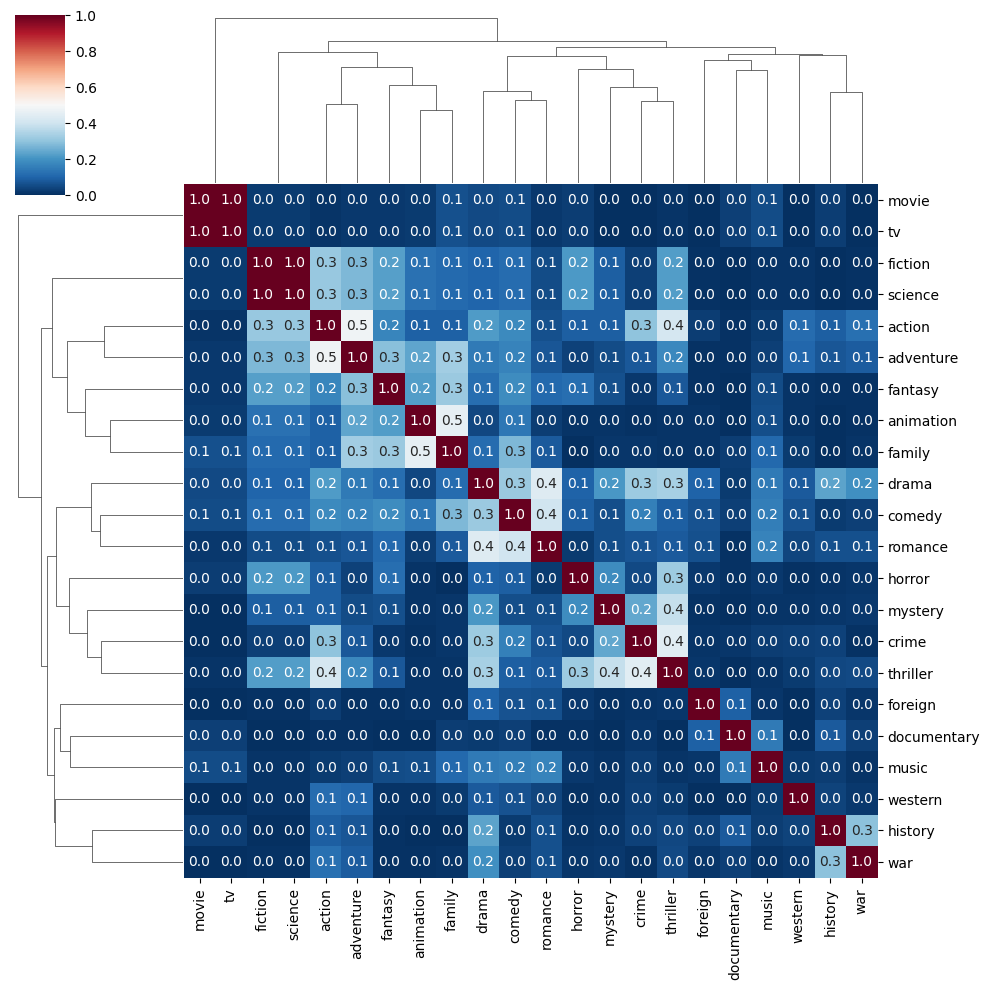

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
# sns.heatmap(genre_sim_df, annot=True, fmt='.2f', cmap='YlGnBu')
# sns.clustermap(genre_sim_df, 
#                annot=True, 
#                cmap='coolwarm', 
#                figsize=(12, 12),
#                metric='cosine') # 유사도 측정 방식 지정
sns.clustermap(genre_sim_df, 
               annot=True, 
               fmt='.1f',       # 소수점 한 자리로 축소
               cmap='RdBu_r',   # Red-Blue 반전 (빨강이 높은 유사도)
               center=0.5,      # 0.5를 기준으로 색상 대비
               figsize=(10, 10))
plt.show()


In [ ]:
genre_names